In [177]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import timeit

In [178]:
from surprise import SVD, KNNBasic, BaselineOnly # algos
from surprise import Dataset # data
from surprise import GridSearch, evaluate, print_perf # evaluate

In [182]:
def compute(data, Time, MAE, FilteringMethod):
    # Baseline
    algo = BaselineOnly()
    start_time = timeit.default_timer()
    perf = evaluate(algo, data, measures=['RMSE', 'MAE'])
    elapsed = timeit.default_timer() - start_time

    Time.append(elapsed)
    MAE.append(np.mean(perf['MAE']))
    FilteringMethod.append('Baseline')

    # SVD
    algo = SVD()
    start_time = timeit.default_timer()
    perf = evaluate(algo, data, measures=['RMSE', 'MAE'])
    elapsed = timeit.default_timer() - start_time

    Time.append(elapsed)
    MAE.append(np.mean(perf['MAE']))
    FilteringMethod.append('SVD')

    # item-item
    sim_options = {'name': 'msd', 'user_based': False }
    start_time = timeit.default_timer()
    algo = KNNBasic(sim_options=sim_options)
    perf = evaluate(algo, data, measures=['RMSE', 'MAE'])
    elapsed = timeit.default_timer() - start_time

    Time.append(elapsed)
    MAE.append(np.mean(perf['MAE']))
    FilteringMethod.append('Item-Item')

    # user-user
    sim_options = {'name': 'msd', 'user_based': True }
    start_time = timeit.default_timer()
    algo = KNNBasic(sim_options=sim_options)
    perf = evaluate(algo, data, measures=['RMSE', 'MAE'])
    elapsed = timeit.default_timer() - start_time

    Time.append(elapsed)
    MAE.append(np.mean(perf['MAE']))
    FilteringMethod.append('User-User')

### Compare performance for SVD, item-item, user-user on 100k

# 100,000 ratings (1-5) from 943 users on 1682 movies. 
# Each user has rated at least 20 movies. 

In [179]:
data = Dataset.load_builtin('ml-100k')
data.split(n_folds=5)

In [180]:
res = {'Time':[], 'Mean Absolute Error':[], 'Filtering Method':[], 'Size': []}
res = pd.DataFrame(res)

In [184]:
Time = []
MAE = []
FilteringMethod = []
Size = []

compute(data, Time, MAE, FilteringMethod)

Evaluating RMSE, MAE of algorithm BaselineOnly.

------------
Fold 1
Estimating biases using als...
RMSE: 0.9416
MAE:  0.7502
------------
Fold 2
Estimating biases using als...
RMSE: 0.9443
MAE:  0.7472
------------
Fold 3
Estimating biases using als...
RMSE: 0.9504
MAE:  0.7511
------------
Fold 4
Estimating biases using als...
RMSE: 0.9400
MAE:  0.7463
------------
Fold 5
Estimating biases using als...
RMSE: 0.9434
MAE:  0.7473
------------
------------
Mean RMSE: 0.9440
Mean MAE : 0.7484
------------
------------
Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.9319
MAE:  0.7382
------------
Fold 2
RMSE: 0.9377
MAE:  0.7379
------------
Fold 3
RMSE: 0.9415
MAE:  0.7398
------------
Fold 4
RMSE: 0.9342
MAE:  0.7381
------------
Fold 5
RMSE: 0.9381
MAE:  0.7393
------------
------------
Mean RMSE: 0.9367
Mean MAE : 0.7387
------------
------------
Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing s

In [185]:
data = Dataset.load_builtin('ml-1m')
data.split(n_folds=5)

In [186]:
compute(data, Time, MAE, FilteringMethod)

Evaluating RMSE, MAE of algorithm BaselineOnly.

------------
Fold 1
Estimating biases using als...
RMSE: 0.9111
MAE:  0.7214
------------
Fold 2
Estimating biases using als...
RMSE: 0.9086
MAE:  0.7192
------------
Fold 3
Estimating biases using als...
RMSE: 0.9094
MAE:  0.7207
------------
Fold 4
Estimating biases using als...
RMSE: 0.9074
MAE:  0.7186
------------
Fold 5
Estimating biases using als...
RMSE: 0.9076
MAE:  0.7179
------------
------------
Mean RMSE: 0.9088
Mean MAE : 0.7196
------------
------------
Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.8754
MAE:  0.6864
------------
Fold 2
RMSE: 0.8735
MAE:  0.6858
------------
Fold 3
RMSE: 0.8732
MAE:  0.6861
------------
Fold 4
RMSE: 0.8716
MAE:  0.6846
------------
Fold 5
RMSE: 0.8729
MAE:  0.6849
------------
------------
Mean RMSE: 0.8733
Mean MAE : 0.6856
------------
------------
Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing s

In [187]:
res['Time'] = Time
res['Filtering Method'] = FilteringMethod
res['MAE'] = MAE
res['Size'] = ['100k', '100k', '100k', '100k', '1mil', '1mil', '1mil', '1mil']

In [209]:
res

,Filtering Method,Mean Absolute Error,Size,Time,MAE
0,Baseline,NaN,100k,3.452772,0.748408
1,SVD,NaN,100k,29.567391,0.738675
2,Item-Item,NaN,100k,23.626348,0.768862
3,User-User,NaN,100k,18.780506,0.772665
4,Baseline,NaN,1mil,32.186043,0.719566
5,SVD,NaN,1mil,298.674454,0.685551
6,Item-Item,NaN,1mil,443.959338,0.719811
7,User-User,NaN,1mil,952.476873,0.727558


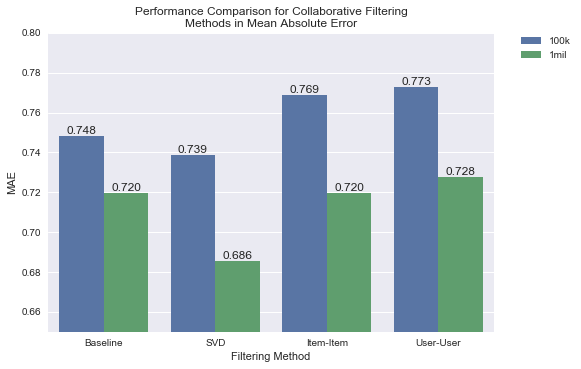

In [207]:
ax = sns.barplot(x="Filtering Method", y="MAE", hue="Size", data=res)
plt.title("Performance Comparison for Collaborative Filtering\nMethods in Mean Absolute Error")
ax.set(ylabel='MAE')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0.65, 0.8)

for bar,newwidth, label in zip(ax.patches,[0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4], res["MAE"]):
    x = bar.get_x()
    width = bar.get_width()
    height = bar.get_height()

    centre = x+width/2.
    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)

    ax.text(x+width/2.,
            height + 0.001,
            '{0:4.3f}'.format(label),
            ha="center") 

plt.show()
ax.figure.savefig("MovieLensMAEComp.png", bbox_inches='tight')

//anaconda/envs/keras/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


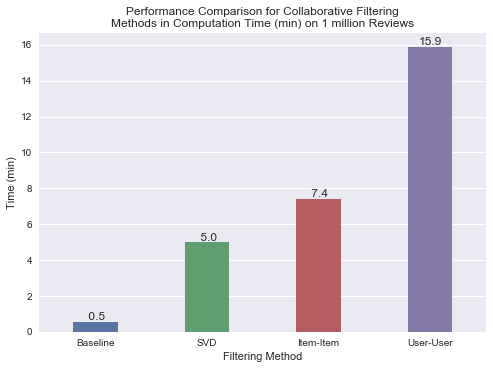

In [222]:
tmp = res[res["Size"] == "1mil"]
tmp["Time"] = tmp["Time"] / 60
ax = sns.barplot(x="Filtering Method", y="Time", data=tmp)
plt.title("Performance Comparison for Collaborative Filtering\nMethods in Computation Time (min) on 1 million Reviews")
ax.set(ylabel='Time (min)')
for bar,newwidth, label in zip(ax.patches,[0.4,0.4,0.4,0.4], tmp["Time"]):
    x = bar.get_x()
    width = bar.get_width()
    height = bar.get_height()

    centre = x+width/2.
    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)

    ax.text(x+width/2.,
            height + 0.1,
            '{0:4.1f}'.format(label),
            ha="center") 
plt.show()
ax.figure.savefig("MovieLensTime1milComp.png", bbox_inches='tight')

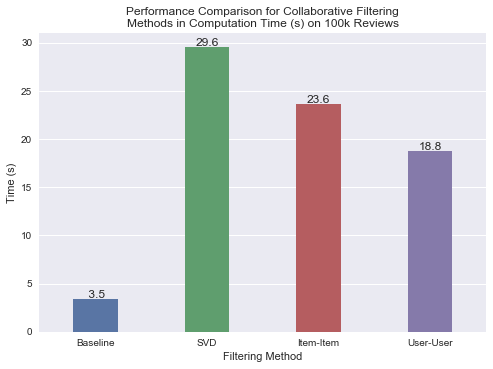

In [216]:
tmp = res[res["Size"] == "100k"]
ax = sns.barplot(x="Filtering Method", y="Time", data=tmp)
plt.title("Performance Comparison for Collaborative Filtering\nMethods in Computation Time (s) on 100k Reviews")
ax.set(ylabel='Time (s)')
for bar,newwidth, label in zip(ax.patches,[0.4,0.4,0.4,0.4], tmp["Time"]):
    x = bar.get_x()
    width = bar.get_width()
    height = bar.get_height()

    centre = x+width/2.
    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)

    ax.text(x+width/2.,
            height + 0.1,
            '{0:4.1f}'.format(label),
            ha="center") 
plt.show()
ax.figure.savefig("MovieLensTime100kComp.png", bbox_inches='tight')

# Grid search to find the best similarity metric

In [170]:
data = Dataset.load_builtin('ml-100k')
data.split(n_folds=5)
grid_search = GridSearch(KNNBasic, param_grid = {
              'sim_options': {'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],
                              'user_based': [False]}
              }, measures=[u'rmse', u'mae'], verbose=1)
grid_search.evaluate(data)

[{'sim_options': {'user_based': False, 'name': 'msd'}}, {'sim_options': {'user_based': False, 'name': 'cosine'}}, {'sim_options': {'user_based': False, 'name': 'pearson'}}, {'sim_options': {'user_based': False, 'name': 'pearson_baseline'}}]
------------
Parameters combination 1 of 4
params:  {'sim_options': {'user_based': False, 'name': 'msd'}}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
Mean RMSE: 0.9742
Mean MAE : 0.7696
------------
------------
Parameters combination 2 of 4
params:  {'sim_options': {'user_based': False, 'name': 'cosine'}}
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...

In [171]:
data = Dataset.load_builtin('ml-100k')
data.split(n_folds=5)
grid_search = GridSearch(KNNBasic, param_grid = {
              'sim_options': {'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],
                              'user_based': [True]}
              }, measures=[u'rmse', u'mae'], verbose=1)
grid_search.evaluate(data)

[{'sim_options': {'user_based': True, 'name': 'msd'}}, {'sim_options': {'user_based': True, 'name': 'cosine'}}, {'sim_options': {'user_based': True, 'name': 'pearson'}}, {'sim_options': {'user_based': True, 'name': 'pearson_baseline'}}]
------------
Parameters combination 1 of 4
params:  {'sim_options': {'user_based': True, 'name': 'msd'}}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
Mean RMSE: 0.9796
Mean MAE : 0.7736
------------
------------
Parameters combination 2 of 4
params:  {'sim_options': {'user_based': True, 'name': 'cosine'}}
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done 

# Recommendations for Jester dataset

In [ ]:
data = Dataset.load_builtin('ml-1m')
data.split(n_folds=5)